In [1]:
import numpy as np
import pandas as pd
#import time as tm
import linecache as gl
import glob
import os
import matplotlib.pyplot as plt
import platform
op_sys = platform.system()

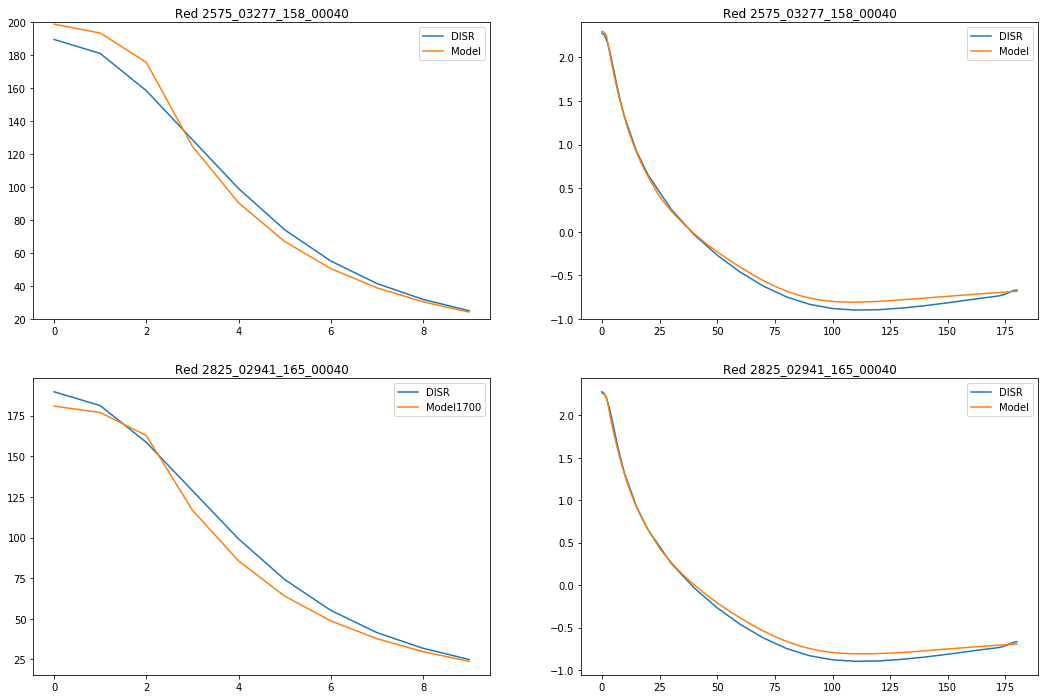

In [2]:

  #%% Plots

if op_sys == 'Windows':
    dtdir = 'C:\\Users\\kurt_\\PARAM DATA\\'
    disr_dt = 'C:\\Users\\kurt_\\Dropbox\\Code\\'
    _sl = '\\'
elif op_sys == 'Linux':
    dtdir = '/home/cihat/programs/gdl/'
    disr_dt = '/home/cihat/Dropbox/code/'
    _sl = '/'
_pm = ['2575_03277_158_00040', '2825_02941_165_00040']
_chn = 'Red'
for pm_id in _pm:
    file=glob.glob(dtdir+'final{}newpm{}.dat'.format(_sl, pm_id))
    file_names = []
    for par in file:
        param_run = par[par.find('pm'):par.find('.dat')]
        file_names.append(param_run)
        q = gl.getline(par, 2)
        q = q.split()
        qabs = [float(q[0])]
        qsca = [float(q[1])]
        qext = [float(q[2])]

        try:
            csca = [float(q[3])]
        except ValueError:
            print('csca value error',param_run)
        cabs =[float(q[4])]
        taus_out = [float(q[5])]
        taua_out = [float(q[6])]

        eff = {'qa': qabs, 'qs': qsca, 'qe': qext, 'cs': csca, 'ca': cabs, 'taus': taus_out, 'taua': taua_out}
        vars()[param_run+'_eff'] = pd.DataFrame(eff)

        # Now I will collect scattering matrix data in a data frame
        data = []
        for line in range(4, 185):
            a = gl.getline(par, line)
            columns = a.split()
            rw = {}
            rw['P11'] = columns[0]
            rw['P12'] = columns[1]
            rw['P22'] = columns[2]
            rw['P33'] = columns[3]
            rw['P34'] = columns[4]
            rw['P44'] = columns[5]

            data.append(rw)

        # Now Converting to a Dataframe
        dt = pd.DataFrame(data)
        del(rw)

        # Let's convert the string values to numeric all at once
        vars()[param_run+'_mx'] = dt.apply(pd.to_numeric)
        vars()[param_run+'_mx']['theta'] = np.arange(0, 181)

        # For now I will not convert the data to xarray. I do not see any benefit
        # doing that other than being able to collect matrix elements and efficien-
        # ies in the same dataset. Hence, below code block is commented

    #    # Now collecting everything in an xarray dataset
    #    # Note that PXX are saved as variable, but Qx and g are saved as dimension
    #    vars()[param_run] = xr.Dataset.from_dataframe(dt)
    #    vars()[param_run]['qext'] = qext
    #    vars()[param_run]['qabs'] = qabs
    #    vars()[param_run]['qsca'] = qsca
    #    vars()[param_run]['g'] = g


os.chdir(dtdir)



Hyg_Blue = pd.read_pickle(disr_dt+'Hyg_Blue.pkl')
Hyg_Red = pd.read_pickle(disr_dt+'Hyg_Red.pkl')
th = Hyg_Blue.theta
theta = pm2575_03277_158_00040_mx.theta

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))
if _chn == 'Blue':
    axes[0,0].plot(th[:10],(Hyg_Blue.P11)[:10], label='DISR')
    axes[0,0].plot( theta[:10], (pm2575_03277_158_00040_mx.P11)[:10], label='Model')

    axes[0,0].set_title('Blue 2575_03277_158_00040')
    axes[0,0].legend()

    axes[0,1].plot(th, np.log10(Hyg_Blue.P11), label='DISR')
    axes[0,1].plot(theta, np.log10(pm2575_03277_158_00040_mx.P11), label='Model')
    axes[0,1].set_ylim(-1.0, 2.8)
    axes[0,1].set_title('Blue 2575_03277_158_00040')
    axes[0,1].legend()

    axes[1,0].plot(th[:10],(Hyg_Blue.P11)[:10], label='DISR')
    axes[1,0].plot( theta[:10], (pm2825_02941_165_00040_mx.P11)[:10], label='Model')
    axes[1,0].set_title('Blue 2825_02941_165_00040')
    axes[1,0].legend()
    #newpm2825_02941_165_00040_mx[65:] = newpm2825_02941_165_00040_mx[65:]*0.8333
    axes[1,1].plot(th, np.log10(Hyg_Blue.P11), label='DISR')
    axes[1,1].plot(theta, np.log10(pm2825_02941_165_00040_mx.P11), label='Model')
    axes[1,1].set_title('Blue 2825_02941_165_00040')
    axes[1,1].legend()
elif _chn == 'Red':
    axes[0,0].plot(th[:10],(Hyg_Red.P11)[:10], label='DISR')
    axes[0,0].plot( theta[:10], (pm2575_03277_158_00040_mx.P11)[:10], label='Model')
    axes[0,0].set_ylim(20, 200)

    axes[0,0].set_title('Red 2575_03277_158_00040')
    axes[0,0].legend()

    axes[0,1].plot(th, np.log10(Hyg_Red.P11), label='DISR')
    axes[0,1].plot(theta, np.log10(pm2575_03277_158_00040_mx.P11), label='Model')
    axes[0,1].set_ylim(-1.0, 2.4)
    axes[0,1].set_title('Red 2575_03277_158_00040')
    axes[0,1].legend()

    axes[1,0].plot(th[:10],(Hyg_Red.P11)[:10], label='DISR')
    axes[1,0].plot( theta[:10], (pm2825_02941_165_00040_mx.P11)[:10], label='Model1700')
    axes[1,0].set_title('Red 2825_02941_165_00040')
    axes[0,0].set_ylim(20, 200)
    axes[1,0].legend()
    #newpm2825_02941_165_00040_mx[65:] = newpm2825_02941_165_00040_mx[65:]*0.8333
    axes[1,1].plot(th, np.log10(Hyg_Red.P11), label='DISR')
    axes[1,1].plot(theta, np.log10(pm2825_02941_165_00040_mx.P11), label='Model')
    axes[0,1].set_ylim(-1.0, 2.4)
    axes[1,1].set_title('Red 2825_02941_165_00040')
    axes[1,1].legend()
plt.show()
plt.close()
